# Programming Assignment # 3 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Ajith Sivadas

ID: axs9098

Team Mate name : Sai Parinita Pachalla

ID: sxp1209

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster adults using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Adult". You can find more information here: https://archive.ics.uci.edu/ml/datasets/adult.
The classification problem is whether they earn more than 50,000$ or not.



You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

import pandas as pd 
from pandas import  DataFrame
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from matplotlib import pyplot as plt

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

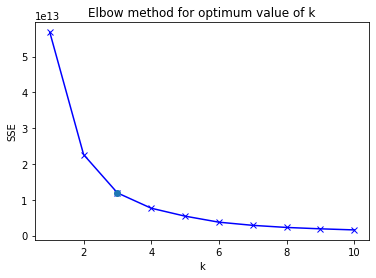

The optimal value of k is 3


In [14]:
#########################begin code for Task 1-a
#reading the csv file into a dataframe 
df_data = pd.read_csv('clusteringdata.csv',engine ='python',encoding='latin1')
#pre processing of the data 
le = preprocessing.LabelEncoder()
df_data['WorkClass'] = le.fit_transform(df_data['WorkClass'])
df_data['Education'] = le.fit_transform(df_data['Education'])
df_data['MaritalStatus'] = le.fit_transform(df_data['MaritalStatus'])
df_data['Occupation'] = le.fit_transform(df_data['Occupation'])
df_data['Relationship'] = le.fit_transform(df_data['Relationship'])
df_data['Race'] = le.fit_transform(df_data['Race'])
df_data['Sex'] = le.fit_transform(df_data['Sex'])
df_data['NativeCountry'] = le.fit_transform(df_data['NativeCountry'])
df_data['Class'] = le.fit_transform(df_data['Class'])
#droping the rows which is having None values
rows_to_drop = df_data[(df_data['WorkClass'] == None)| (df_data['Education'] == None) | (df_data['MaritalStatus'] == None)| (df_data['Occupation'] == None)| (df_data['Relationship'] == None) | (df_data['Race'] == None)| (df_data['Sex'] == None) | (df_data['NativeCountry'] == None)| (df_data['Class'] == None)].index
df_data.drop(rows_to_drop , inplace=True)

#elbow method to find the best K value
sse=[]
#Range which is mentioned 
ke= range (1,11)
for k in ke:
    km= KMeans(n_clusters=k,init='k-means++', random_state=0)
    km=km.fit(df_data)
    sse.append(km.inertia_)
#Ploting the graph of the elbow method as x-axis k value and the y-axis as SSE
plt.plot(ke,sse,'bx-')
plt.title('Elbow method for optimum value of k')
plt.xlabel('k')
plt.ylabel('SSE')
#Marking the optimal K in the Graph 
plt.plot(3,sse[2],marker='o')
plt.show()
print('The optimal value of k is 3')
#########################begin code for Task 1-a


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Perform kmeans for clustering on the complete training set or whole dataset. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [15]:
###################begin code for Task 1-b-1:



# ### Important!!!

#######end code for Task 1-b-1

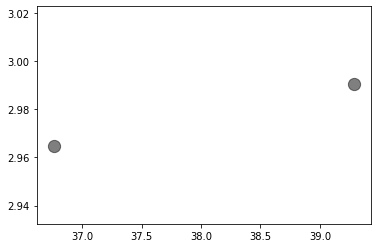

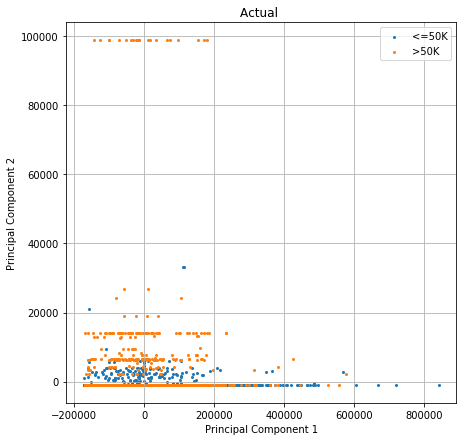

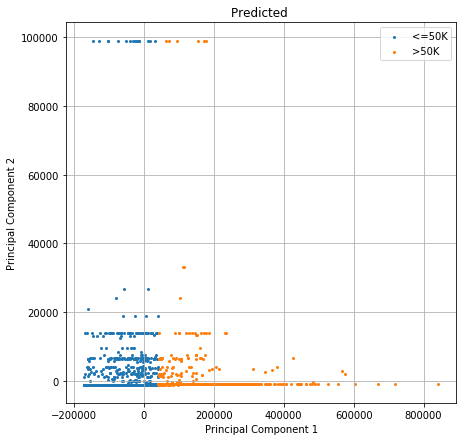

In [16]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
#Citaions :https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model

kmeans = KMeans(n_clusters=2, init ='k-means++',random_state=0 )
#Training the clustering model
clus = kmeans.fit(df_data)
#Predicting the output for the whole Dataset 
predict_clus = kmeans.predict(df_data)
#output of the predicted converted to a dataframe
df_predicted = pd.DataFrame(data=predict_clus,columns=['df_predicted'])

# Compute cluster centers and predict cluster index for each sample 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5);


# Model and fit the data to the PCA model
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(df_data)
pca_training  = pd.DataFrame(data = pca_2d,columns = ['principal component 1', 'principal component 2'])



# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
# Visualize the  actual training labels
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
target_values = [0,1]
for target_values in zip(target_values):
    indicesToKeep = df_data['Class'] == target_values
    #Plotting the Graph with Principle Componant in x and y axis
    ax.scatter(pca_training.loc[indicesToKeep, 'principal component 1'], pca_training.loc[indicesToKeep, 'principal component 2'], 
                s = 4)
ax.set_title('Actual ')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
legend = ["<=50K",">50K"]
plt.legend(legend)
plt.grid()

# Visualize the predicted training 
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 

target_values = [0,1]
for target_values in zip(target_values):
    indicesToKeep = predict_clus == target_values
    ax.scatter(pca_training.loc[indicesToKeep, 'principal component 1'], pca_training.loc[indicesToKeep, 'principal component 2'], 
                s = 4)
ax.set_title('Predicted ')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
legend = ["<=50K",">50K"]
plt.legend(legend)
plt.grid()






###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

In [17]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 

# Model and fit the data to the PCA model
# X_test_pca = None

# # Visualize the predicted testing labels vs actual testing labels. 
# ### scatter(x, y, your_data)
# x = X_test_pca[:, 0]
# y = X_test_pca[:, 1]


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [18]:
###################begin code for Task 1-b-4: Print out a confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(df_data['Class'],df_predicted))

###################end code for Task 1-b-4

[[2712 1067]
 [ 927  294]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [19]:
###################begin code for Task 2-a: Print out a confusion matrix

scaler = StandardScaler()
X_std = scaler.fit_transform(df_data)
X = X_std
from sklearn.model_selection import train_test_split
y = df_data['Class']

## Calculate pairwise distance matrix for X_train
#citation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

pdm_train_cosine = pairwise_distances(X,metric='cosine')
pdm_train_euclidean = pairwise_distances(X,metric='euclidean')
pdm_train_manhattan = pairwise_distances(X,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
clustering_cosine = AgglomerativeClustering(linkage='complete', 
                              affinity='precomputed', 
                              n_clusters=2)
pred_cosine = clustering_cosine.fit_predict(pdm_train_cosine)
f1_cosine = f1_score(y, pred_cosine,average='weighted')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
clustering_euclidean = AgglomerativeClustering(linkage='complete', 
                              affinity='precomputed', 
                              n_clusters=2)
pred_euclidean = clustering_euclidean.fit_predict(pdm_train_euclidean)
f1_euclidean = f1_score(y, pred_euclidean,average='weighted')
# ## Model and fit the training data to the AgglomerativeClustering model
# ## complete linkage + manhattan
clustering_manhattan = AgglomerativeClustering(linkage='complete', 
                              affinity='precomputed', 
                              n_clusters=2)
pred_manhattan = clustering_manhattan.fit_predict(pdm_train_manhattan)
f1_manhattan = f1_score(y, pred_manhattan,average='weighted')
# ## Model and fit the training data to the AgglomerativeClustering model
# ## average linkage + cosine
clustering_cosine_average = AgglomerativeClustering(linkage='average', 
                              affinity='precomputed', 
                              n_clusters=2)
pred_cosine_average = clustering_cosine_average.fit_predict(pdm_train_cosine)
f1_cosine_average = f1_score(y, pred_cosine_average,average='weighted')
# ## Model and fit the training data to the AgglomerativeClustering model
# ## average linkage + euclidean
clustering_euclidean_average = AgglomerativeClustering(linkage='average', 
                              affinity='precomputed', 
                              n_clusters=2)
pred_euclidean_average = clustering_euclidean_average.fit_predict(pdm_train_euclidean)
f1_euclidean_average = f1_score(y, pred_euclidean_average,average='weighted')
# ## Model and fit the training data to the AgglomerativeClustering model
# ## average linkage + manhattan
clustering_manhattan_average = AgglomerativeClustering(linkage='average', 
                              affinity='precomputed', 
                              n_clusters=2)
pred_manhattan_average = clustering_manhattan_average.fit_predict(pdm_train_manhattan)
f1_manhattan_average = f1_score(y, pred_manhattan_average,average='weighted')

#Printing the calculated f1_values
print("F1-score for complete linkage + cosine", f1_cosine)
print("F1-score for complete linkage + euclidean", f1_euclidean)
print("F1-score for complete linkage + manhattan", f1_manhattan)
print("F1-score for average linkage + cosine", f1_cosine_average)
print("F1-score for average linkage + euclidean", f1_euclidean_average)
print("F1-score for average linkage + manhattan", f1_manhattan_average)


#Note : Best Linkage+Similarity is the Average cosine method
###################end code for Task 2-a

F1-score for complete linkage + cosine 0.7042084317175918
F1-score for complete linkage + euclidean 0.660960840227944
F1-score for complete linkage + manhattan 0.660960840227944
F1-score for average linkage + cosine 0.7413755597512962
F1-score for average linkage + euclidean 0.660960840227944
F1-score for average linkage + manhattan 0.660960840227944


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

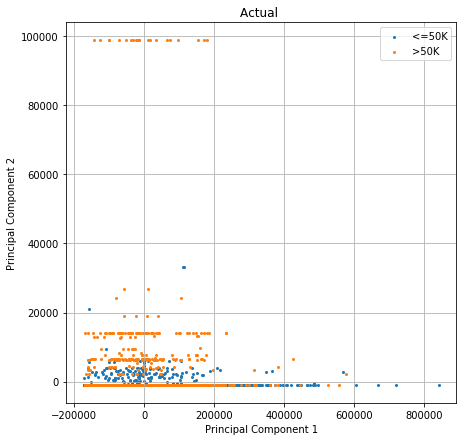

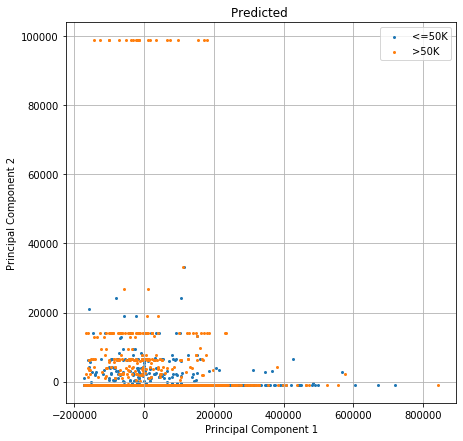

In [20]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
# Visualize the predicted training labels versus actual training labels. 
# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
clustering_cosine_average = AgglomerativeClustering(linkage='average', 
                              affinity='precomputed', 
                              n_clusters=2)
pred_cosine_average = clustering_cosine_average.fit_predict(pdm_train_cosine)
df_predicted = pd.DataFrame(data=pred_cosine_average,columns=['df_predicted'])

# Compute cluster centers and predict cluster index for each sample 

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(df_data)
pca_training  = pd.DataFrame(data = pca_2d,columns = ['principal component 1', 'principal component 2'])

#Visualize the predicted training labels vs actual training labels. 

# Visualize the  actual training labels
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
target_values = [0,1]
for target_values in zip(target_values):
    indicesToKeep = df_data['Class'] == target_values
    ax.scatter(pca_training.loc[indicesToKeep, 'principal component 1'], pca_training.loc[indicesToKeep, 'principal component 2'], 
                s = 4)
ax.set_title('Actual ')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
legend = ["<=50K",">50K"]
plt.legend(legend)
plt.grid()

# Visualize the predicted training 
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
target_values = [0,1]
for target_values in zip(target_values):
    indicesToKeep = df_predicted['df_predicted'] == target_values
    ax.scatter(pca_training.loc[indicesToKeep, 'principal component 1'], pca_training.loc[indicesToKeep, 'principal component 2'], 
                s = 4)
ax.set_title('Predicted ')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
legend = ["<=50K",">50K"]
plt.legend(legend)
plt.grid()
###################end code for Task 2-b

# TASK 3:  WEKA Visualization of K-means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a : Visualize the k-means clustering using weka

In [21]:
###################start Task 3-a
print("Weka images have been placed in the weka folder of the zip file")
print("The visualizations have been taken against Class and Feature:'Sex' ")
print("From the visualizations It is clear that the values which has to be >50k should be in cluster 0 and  <=50k should be in cluster 1 ")
print("But on predicting in Kmeans it is the other way which is wrongly clusted. so the accuracy is low compaired to hierarchical clustering ")
###################end Task 3-a

Weka images have been placed in the weka folder of the zip file
The visualizations have been taken against Class and Feature:'Sex' 
From the visualizations It is clear that the values which has to be >50k should be in cluster 0 and  <=50k should be in cluster 1 
But on predicting in Kmeans it is the other way which is wrongly clusted. so the accuracy is low compaired to hierarchical clustering 


## Task 3-b : Visualize the hierarchical clustering using weka

In [22]:
###################start Task 3-b
print("Weka images have been placed in the weka folder of the zip file")
print("The visualizations have been taken against Class and Feature:'Sex' ")
print("From the visualizations the predicted values are different from the actual values")
print("The predicted values depict the values >50k as <=50k. There are some false values that exist hence the clusteing is little better than Kmeans.")
###################end Task 3-b

Weka images have been placed in the weka folder of the zip file
The visualizations have been taken against Class and Feature:'Sex' 
From the visualizations the predicted values are different from the actual values
The predicted values depict the values >50k as <=50k. There are some false values that exist hence the clusteing is little better than Kmeans.


# (BONUS)
# TASK 4:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 4-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

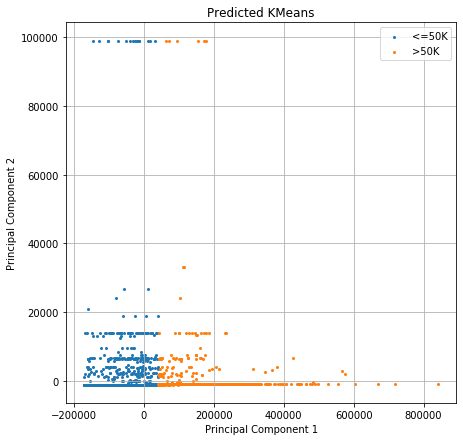

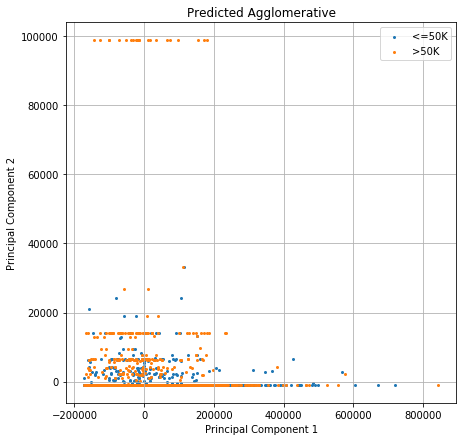

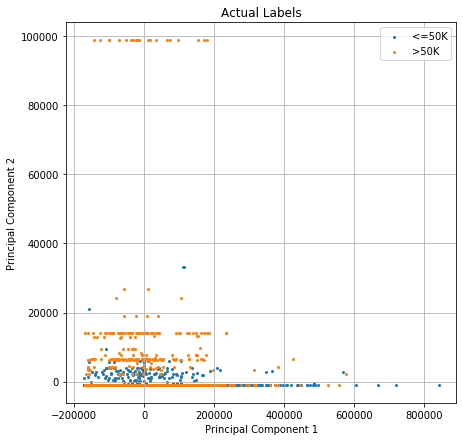

In [23]:
###################begin code for Task 4-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

means = KMeans(n_clusters=3, init ='k-means++',random_state=0 )

clus = kmeans.fit(df_data)

predict_clus = kmeans.predict(df_data)

df_predicted = pd.DataFrame(data=predict_clus,columns=['df_predicted'])

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
clustering_cosine_average = AgglomerativeClustering(linkage='average', 
                              affinity='precomputed', 
                              n_clusters=2)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
pred_cosine_average = clustering_cosine_average.fit_predict(pdm_train_cosine)
df_predicted_Agglomerative = pd.DataFrame(data=pred_cosine_average,columns=['df_predicted'])

### Visualize Clusters
#  Model and fit the data to the PCA model
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(df_data)
pca_training  = pd.DataFrame(data = pca_2d,columns = ['principal component 1', 'principal component 2'])




# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
#Visualize the predicted Kmeans labels
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
target_values = [0,1]
for target_values in zip(target_values):
    indicesToKeep = df_predicted['df_predicted'] == target_values
    ax.scatter(pca_training.loc[indicesToKeep, 'principal component 1'], pca_training.loc[indicesToKeep, 'principal component 2'], 
                s = 4)
ax.set_title('Predicted KMeans')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
legend = ["<=50K",">50K"]
plt.legend(legend)
plt.grid()
#Visualize the predicted Agglomerative labels
fig2 = plt.figure(figsize = (7,7))
ax1 = fig2.add_subplot(1,1,1) 
target_values = [0,1]
for target_values in zip(target_values):
    indicesToKeep = df_predicted_Agglomerative['df_predicted'] == target_values
    ax1.scatter(pca_training.loc[indicesToKeep, 'principal component 1'], pca_training.loc[indicesToKeep, 'principal component 2'], 
                s = 4)
ax1.set_title('Predicted Agglomerative')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
legend = ["<=50K",">50K"]
plt.legend(legend)
plt.grid()


#Visualize the predicted Actual labels
fig3 = plt.figure(figsize = (7,7))
ax3 = fig3.add_subplot(1,1,1)
target_values = [0,1]
for target_values in zip(target_values):
    indicesToKeep = df_data['Class'] == target_values
    ax3.scatter(pca_training.loc[indicesToKeep, 'principal component 1'], pca_training.loc[indicesToKeep, 'principal component 2'], 
                s = 4)
ax3.set_title('Actual Labels')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')
legend = ["<=50K",">50K"]
plt.legend(legend)
plt.grid()

###################end code for Task 4-a

## Task 4-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [24]:
###################begin code for Task 4-b
print('The confusion matrix of Kmens')
confusion_1 = confusion_matrix(df_data[df_data.columns[-1]],df_predicted)
print(confusion_1)
print('The confusion matrix of Agglomerative')
confusion_2 = confusion_matrix(df_data[df_data.columns[-1]],df_predicted_Agglomerative)
print(confusion_2)

print("The Precision of Kmeans")
Precision_1 = precision_score(df_data[df_data.columns[-1]],df_predicted)
print(Precision_1)
print("The Precision of Agglomerative")
Precision_2 = precision_score(df_data[df_data.columns[-1]],df_predicted_Agglomerative)
print(Precision_2)

print("The Recall of Kmens")
Recall_1 = recall_score(df_data[df_data.columns[-1]],df_predicted)
print(Recall_1)
print("The Recall of Agglomerative")
Recall_2 = recall_score(df_data[df_data.columns[-1]],df_predicted_Agglomerative)
print(Recall_2)

print("The f1 Score of Kmeans")
f1_score_1 = f1_score(df_data[df_data.columns[-1]],df_predicted)
print(f1_score_1)
print("The f1 Score of Agglomerative")
f1_score_2 = f1_score(df_data[df_data.columns[-1]],df_predicted_Agglomerative)
print(f1_score_2)

print("The Accuracy of Kmeans")
print(metrics.accuracy_score(df_data[df_data.columns[-1]],df_predicted))
print("The Accuracy of Agglomerative")
print(metrics.accuracy_score(df_data[df_data.columns[-1]],df_predicted_Agglomerative))

print()
print("From the confusion Matrix It is evident that the True Positive and the True Negative is much more correctly classified in Agglomerative rather than Kmens. That is, the case in the Precision ,Recall and F1 Score apart form that we have calculated the Accuracy which confirms our conculsion that the Agglomerative is classifying better than Kmens.")
###################end code for Task 4-b

The confusion matrix of Kmens
[[2712 1067]
 [ 927  294]]
The confusion matrix of Agglomerative
[[2734 1045]
 [ 332  889]]
The Precision of Kmeans
0.216017634092579
The Precision of Agglomerative
0.4596690796277146
The Recall of Kmens
0.24078624078624078
The Recall of Agglomerative
0.7280917280917281
The f1 Score of Kmeans
0.22773044151820293
The f1 Score of Agglomerative
0.5635499207606973
The Accuracy of Kmeans
0.6012
The Accuracy of Agglomerative
0.7246

From the confusion Matrix It is evident that the True Positive and the True Negative is much more correctly classified in Agglomerative rather than Kmens. That is, the case in the Precision ,Recall and F1 Score apart form that we have calculated the Accuracy which confirms our conculsion that the Agglomerative is classifying better than Kmens.


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[30 points] Task 1:</b>  

    [05 points] Task 1-a: Determine “k” value from the elbow method

    [20 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [05 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [05 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[30 points] Task 2:</b>  

    [20 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering

<b>[40 points] Task 3 (BONUS):</b> 

    Task 3-a: 20 points

    Task 3-b: 20 points

<b>[20 points] Task 4 (BONUS):</b> 

    Task 4-a: 10 points

    Task 4-b: 10 points